In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Customer_Churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [6]:
data = data.dropna(how='any', axis = 0)

In [7]:
data = data.reset_index()
data

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [8]:
cols = data.select_dtypes(include=['object']).columns
cols
data2 = data.copy()

In [9]:
# now changing data via label encoding/....
# so thay we can apply for model
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cols:
    data2[col] = le.fit_transform(data2[col].astype(str))

print (data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7032 non-null   int64  
 1   customerID        7032 non-null   int32  
 2   gender            7032 non-null   int32  
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int32  
 5   Dependents        7032 non-null   int32  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int32  
 8   MultipleLines     7032 non-null   int32  
 9   InternetService   7032 non-null   int32  
 10  OnlineSecurity    7032 non-null   int32  
 11  OnlineBackup      7032 non-null   int32  
 12  DeviceProtection  7032 non-null   int32  
 13  TechSupport       7032 non-null   int32  
 14  StreamingTV       7032 non-null   int32  
 15  StreamingMovies   7032 non-null   int32  
 16  Contract          7032 non-null   int32  


In [10]:
data2.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,5365,0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,1,3953,1,0,0,0,34,1,0,0,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2,2558,1,0,0,0,2,1,0,0,...,0,0,0,0,0,1,3,53.85,108.15,1
3,3,5524,1,0,0,0,45,0,1,0,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,4,6500,0,0,0,0,2,1,0,1,...,0,0,0,0,0,1,2,70.70,151.65,1


In [11]:
X = data2.iloc[:,:21]
y = data2.iloc[:,21:]

In [12]:
X.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,5365,0,0,1,0,1,0,1,0,...,2,0,0,0,0,0,1,2,29.85,29.85
1,1,3953,1,0,0,0,34,1,0,0,...,0,2,0,0,0,1,0,3,56.95,1889.50
2,2,2558,1,0,0,0,2,1,0,0,...,2,0,0,0,0,0,1,3,53.85,108.15
3,3,5524,1,0,0,0,45,0,1,0,...,0,2,2,0,0,1,0,0,42.30,1840.75
4,4,6500,0,0,0,0,2,1,0,1,...,0,0,0,0,0,0,1,2,70.70,151.65


In [13]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1111)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5274, 21)
(1758, 21)
(5274, 1)
(1758, 1)


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0,
                                    max_depth = 2, min_samples_leaf = 10, min_samples_split = 20
                                   )

classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=20,
                       random_state=0)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7468714448236633

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[985, 318],
       [127, 328]], dtype=int64)

In [22]:
from sklearn.metrics import roc_auc_score

In [23]:
roc_auc_score(y_test,y_pred)

0.7384134668094761

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
pGrid = {'max_depth': range(2, 10), # 8
        'min_samples_leaf': range(10, 51, 10),  # 5
        'min_samples_split': range(20, 81, 20)}   # 4

gscv = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = pGrid, cv = 5,
                       scoring = 'recall', n_jobs = -1, verbose = True)

In [26]:
gscv.fit(X,y)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   19.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(10, 51, 10),
                         'min_samples_split': range(20, 81, 20)},
             scoring='recall', verbose=True)

In [27]:
gscv.best_params_

{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 20}

# RANDOM FOREST

In [41]:
from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier(n_estimators = 70, criterion = 'gini', random_state = 0)
classifier2.fit(X_train, y_train)

<ipython-input-41-f87858d2a048>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier2.fit(X_train, y_train)


RandomForestClassifier(n_estimators=70, random_state=0)

In [42]:
y_pred = classifier2.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8048919226393629

In [44]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.706751958708981

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1186,  117],
       [ 226,  229]], dtype=int64)

In [46]:
pargrid_rf = {'n_estimators': [70, 80, 90, 100, 120],
                  'max_features': [5,10,15,20,25]}

gscv_rf = GridSearchCV(estimator = RandomForestClassifier(), 
                        param_grid = pargrid_rf, 
                        cv = 5,
                        verbose = True, 
                        n_jobs = -1)

gscv_rf.fit(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   49.0s finished
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [5, 10, 15, 20, 25],
                         'n_estimators': [70, 80, 90, 100, 120]},
             verbose=True)

In [47]:
gscv_rf.best_params_

{'max_features': 5, 'n_estimators': 100}

In [50]:
from matplotlib import pyplot as plt
from sklearn import datasets 
from sklearn import tree

[Text(418.5, 453.0, 'X[16] <= -0.222\ngini = 0.392\nsamples = 5274\nvalue = [3860, 1414]'),
 Text(209.25, 271.8, 'X[10] <= -0.334\ngini = 0.49\nsamples = 2931\nvalue = [1669, 1262]'),
 Text(104.625, 90.59999999999997, 'gini = 0.5\nsamples = 1985\nvalue = [970, 1015]'),
 Text(313.875, 90.59999999999997, 'gini = 0.386\nsamples = 946\nvalue = [699, 247]'),
 Text(627.75, 271.8, 'X[19] <= 1.165\ngini = 0.121\nsamples = 2343\nvalue = [2191, 152]'),
 Text(523.125, 90.59999999999997, 'gini = 0.077\nsamples = 1912\nvalue = [1835, 77]'),
 Text(732.375, 90.59999999999997, 'gini = 0.287\nsamples = 431\nvalue = [356, 75]')]

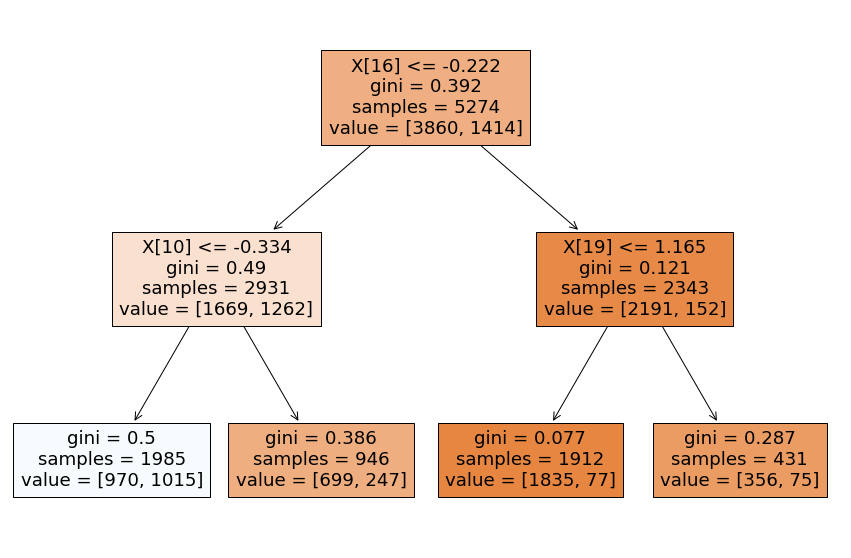

In [51]:
plt.figure(figsize = (15,10))
tree.plot_tree(classifier, filled = True)

In [52]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_16 <= -0.22
|   |--- feature_10 <= -0.33
|   |   |--- class: 1
|   |--- feature_10 >  -0.33
|   |   |--- class: 0
|--- feature_16 >  -0.22
|   |--- feature_19 <= 1.17
|   |   |--- class: 0
|   |--- feature_19 >  1.17
|   |   |--- class: 0



# KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2,leaf_size = 10)
classifier.fit(X_train, y_train)




<ipython-input-73-ac5c4fcdcd7d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)


KNeighborsClassifier(leaf_size=10, n_neighbors=11)

In [74]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1128,  175],
       [ 211,  244]], dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7804323094425484

In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred,y_test)

0.7123793091770477

<AxesSubplot:>

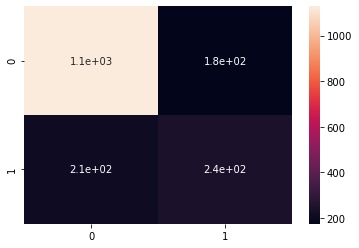

In [77]:
import seaborn as sns
sns.heatmap(cm, annot = True)

In [61]:
from sklearn.model_selection import GridSearchCV

In [68]:
pGrid = {'n_neighbors': range(10,200),
        'leaf_size': range(10, 51, 10), }
gscv = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = pGrid, cv = 5,
                       scoring = 'recall', n_jobs = -1, verbose = True)

In [69]:
gscv.fit(X,y)

Fitting 5 folds for each of 950 candidates, totalling 4750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4750 out of 4750 | elapsed:  4.0min finished
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(10, 51, 10),
                         'n_neighbors': range(10, 200)},
             scoring='recall', verbose=True)

In [71]:
gscv.best_params_

{'leaf_size': 10, 'n_neighbors': 11}

# SVM# 

In [77]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0, C = 10, gamma = 0.01)
classifier.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=10, gamma=0.01, kernel='linear', random_state=0)

In [78]:
y_pred = classifier.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1155,  148],
       [ 225,  230]], dtype=int64)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7878270762229806

In [81]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred,y_test)

0.7227110651023694

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm

In [58]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]# Generally we take the values in this range only
    gammas = [0.001, 0.01, 0.1, 1,10]
    param_grid = {'C': Cs, 'gamma' : gammas}# this is dictionary we are creating so as to get the best tuning
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)# coming from sklearn.modelselection
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [66]:
svc_param_selection(X_train,y_train,5)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

{'C': 10, 'gamma': 0.01}

In [73]:
classifier = SVC(kernel = 'rbf', random_state = 0,C = 10, gamma =  0.01)
classifier.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=10, gamma=0.01, random_state=0)

In [74]:
y_pred = classifier.predict(X_test)

In [82]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8065984072810012

In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.7036121208032182

# NAIVEBYES


In [28]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [30]:
y_pred_nb = classifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_nb)

0.7508532423208191

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_nb)

0.7425299182781915

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)
cm

array([[990, 313],
       [125, 330]], dtype=int64)